#Lending Club Case Study

##Data Loading and Cleansing

###Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

###Loading data from CSV

In [5]:
#Loading the data using pandas
loan_df = pd.read_csv('/content/loan.csv', low_memory = False)

In [6]:
#Returns first 5 rows from the Dataframe object
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#Dimensions of Dataframe
loan_df.shape
print('Number of Rows ', loan_df.shape[0])
print('Number of Columns ', loan_df.shape[1])

Number of Rows  39717
Number of Columns  111


###Data Cleaning

In [14]:
#Identifying null values
loan_df_nulls = loan_df.isna().sum()
loan_df_nulls

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
#Columns having more than 30k null records
loan_df_nulls[loan_df_nulls > 30000]

mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717


In [17]:
#Drop columns having null values greater than 30000
loan_df.drop(loan_df_nulls[loan_df_nulls > 30000].index, axis=1, inplace=True)

In [18]:
loan_df.shape

(39717, 55)

In [19]:
#checking how many unique values are there in individual columns
loan_df_unique = loan_df.nunique()
loan_df_unique.sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [20]:
#Drop columns that have 1 unique value
loan_df.drop(loan_df_unique[loan_df_unique == 1].index, axis=1, inplace=True)

In [21]:
loan_df.shape

(39717, 46)

In [22]:
#Removing columns as per data dictionary which wont make sense from analysis perspective
cols_del = ['member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code',
            'last_credit_pull_d', 'total_rec_late_fee', 'delinq_2yrs',
            'last_pymnt_d', 'revol_bal', 'out_prncp', 'total_pymnt',
            'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee',
            'last_pymnt_amnt','recoveries', 'earliest_cr_line', 'addr_state']

loan_df.drop(cols_del, axis = 1, inplace = True)
#loan_df['chargeoff_within_12_mths']
#loan_df['collections_12_mths_ex_med']
#loan_df['tax_liens']

In [23]:
loan_df.shape

(39717, 26)

In [24]:
loan_df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,dti,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,credit_card,27.65,1,NaN,3,0,83.70%,9,5833.84,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,car,1.00,5,NaN,3,0,9.40%,4,1008.71,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,small_business,8.72,2,NaN,2,0,98.50%,10,3005.67,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,other,20.00,1,35.0,10,0,21%,37,12231.89,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,other,17.94,0,38.0,15,0,53.90%,38,3513.33,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,wedding,11.20,3,NaN,9,0,28.30%,12,5632.21,0.0
6,1069639,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,...,debt_consolidation,23.51,1,NaN,7,0,85.60%,11,10110.84,0.0
7,1072053,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,...,car,5.35,2,NaN,4,0,87.50%,4,3939.14,0.0
8,1071795,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,...,small_business,5.55,2,NaN,11,0,32.60%,13,646.02,0.0
9,1071570,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,...,other,18.08,0,NaN,2,0,36.50%,3,1469.34,0.0


In [25]:
#Find unique Loan Statuses
loan_df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

####Loan status **Current** will not help in approving or rejecting loan hence dropping those rows

In [26]:
loan_df = loan_df[loan_df.loan_status != "Current"]

In [27]:
loan_df.shape

(38577, 26)

In [21]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

##Univariate Analysis

###Loan Status wise categorization

In [31]:
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

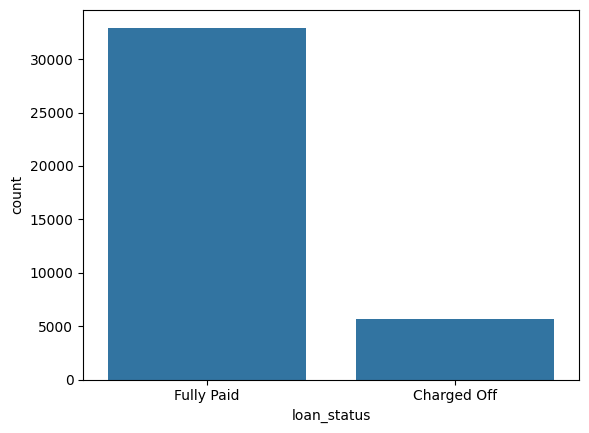

In [30]:
sns.countplot(x = 'loan_status', data = loan_df)

####Insights from the graph:

1.   More than 30000 loans are fully paid
2.   Around 5000 loans are charged off



###Analyze people with tenure

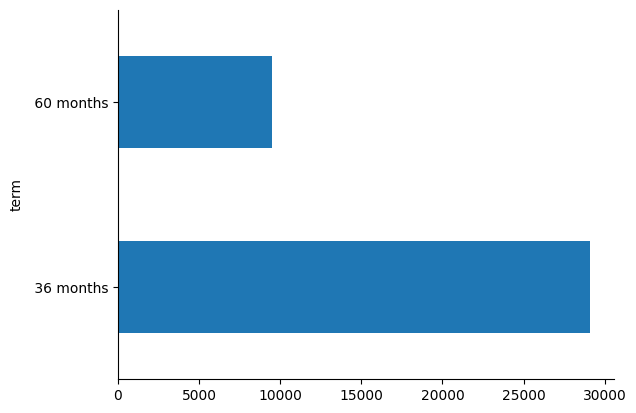

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
loan_df.groupby('term').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

[Text(0.5, 0, 'Home Ownership'), Text(0, 0.5, 'No. of Loans')]

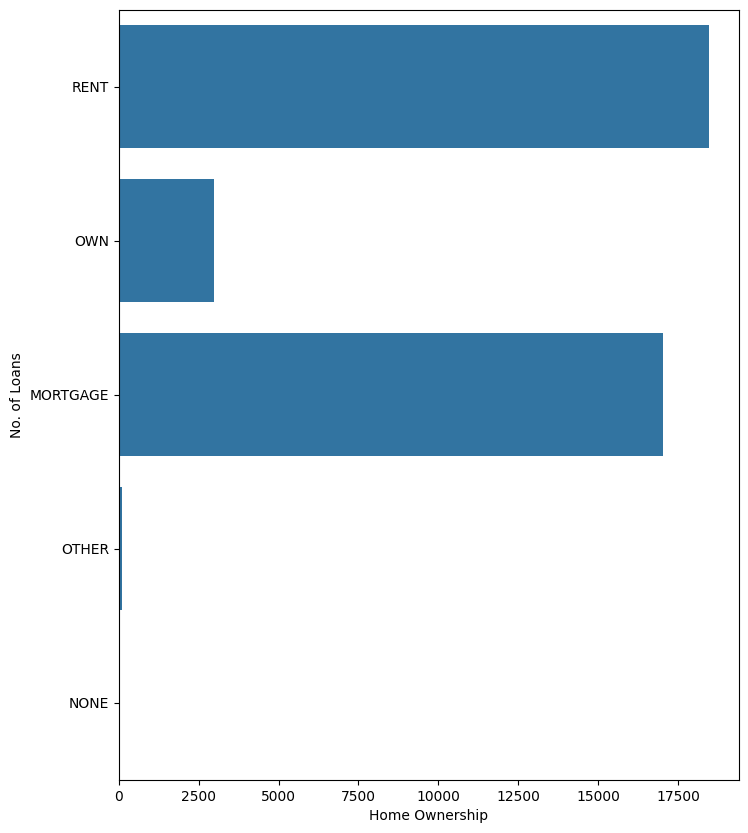

In [38]:
plt.figure(figsize=(8,10))
ax = sns.countplot(loan_df['home_ownership'])
ax.set(xlabel='Home Ownership', ylabel='No. of Loans')

<Axes: xlabel='loan_amnt'>

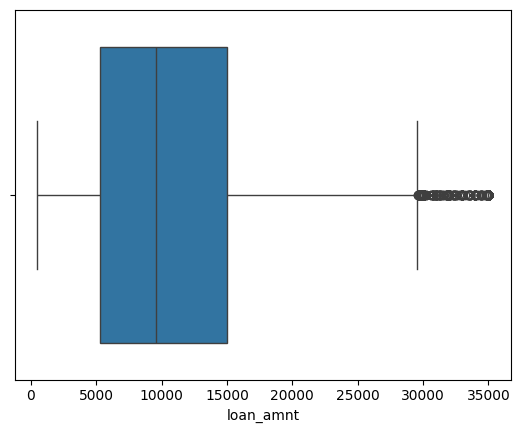

In [36]:
sns.boxplot(x = 'loan_amnt', data = loan_df)

Indicating outliers

In [37]:
quantile_info = loan_df.loan_amnt.quantile([0.75, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])
quantile_info

0.75    15000.0
0.90    21600.0
0.91    23000.0
0.92    24000.0
0.93    25000.0
0.94    25000.0
0.95    25000.0
0.96    25000.0
0.97    28000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

##Function

In [40]:
def bivariateAnalysis(df, col1, col2):
    bivariateAnalysis = pd.crosstab(df[col1], df[col2],margins=True)
    bivariateAnalysis['Charged Off Percentage'] = round(((100 * bivariateAnalysis['Charged Off']) / bivariateAnalysis['All']), 3)
    bivariateAnalysis = bivariateAnalysis[0:-1]
    return bivariateAnalysis

##Bivariate Analysis

###Analysis on Loan Purpose

In [42]:
purpose = bivariateAnalysis(loan_df, 'purpose', 'loan_status')
display(purpose)

loan_status,Charged Off,Fully Paid,All,Charged Off Percentage
purpose,,,,
car,160,1339,1499,10.674
credit_card,542,4485,5027,10.782
debt_consolidation,2767,15288,18055,15.325
educational,56,269,325,17.231
home_improvement,347,2528,2875,12.070
house,59,308,367,16.076
major_purchase,222,1928,2150,10.326
medical,106,575,681,15.565
moving,92,484,576,15.972


####Insights from above table
Purpose of loan as **Small Business** is a risky proportion as there is a higher chance of being charged off

###Analysis based on Interest Rates

In [79]:
loan_df.int_rate=loan_df.int_rate.astype(str).str.rstrip('%').astype('float')
bins = [0, 5, 10, 15, 20, 25]
slot = ['0-5', '5-10', '10-15', '15-20', '20 and above']
loan_df['int_rate_buckets'] = pd.cut(loan_df['int_rate'], bins, labels=slot)

In [80]:
int_rate_buckets = bivariateAnalysis(loan_df, 'int_rate_buckets', 'loan_status')
display(int_rate_buckets)

loan_status,Charged Off,Fully Paid,All,Charged Off Percentage
int_rate_buckets,,,,
5-10,830,11486,12316,6.739
10-15,2707,15558,18265,14.821
15-20,1794,5432,7226,24.827
20 and above,296,474,770,38.442


####Insights from above table
1. Maximum loan applicants have interest rates between 10-15  
2. As interest rates increase, the percentage of loans getting charged off increases
3. Loans with interest rates above 15 percent see a maximum percentage of charged off status






###Analysis based on Loan amount

In [81]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 40000]
slot = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K and above']
loan_df['loan_amt_buckets'] = pd.cut(loan_df['loan_amnt'], bins, labels=slot)

In [82]:
loan_amt_buckets = bivariateAnalysis(loan_df, 'loan_amt_buckets', 'loan_status')
display(loan_amt_buckets)

loan_status,Charged Off,Fully Paid,All,Charged Off Percentage
loan_amt_buckets,,,,
0-5K,1314,8158,9472,13.872
5K-10K,1642,11160,12802,12.826
10K-15K,1055,6628,7683,13.732
15K-20K,751,3598,4349,17.268
20K-25K,542,2294,2836,19.111
25K-30K,143,557,700,20.429
30K and above,180,555,735,24.490


####Insights from above table
1.   Loan amounts less than 30K have a 13-20% chance of being charged off
2.   As loan amount increases above 30K there is a 4% higher chance of loan being charged off



###Analysis based on Loan Term

In [83]:
term = bivariateAnalysis(loan_df, 'term', 'loan_status')
display(term)

loan_status,Charged Off,Fully Paid,All,Charged Off Percentage
term,,,,
36 months,3227,25869,29096,11.091
60 months,2400,7081,9481,25.314


####Insights from above table
1.   Higher the loan term more probability of loan being charged off

